### <span style="color:red;"> Preparing Training Data </span>
#### In generative model first of all we have to make a training data set as a target that in the following steps will help discriminator to compare the results of generative model with targets.
#### Two type of the dataset are considered in this article 
#### <span style="color:green;">Bars_and_Stripes dataset </span>  and <span style="color:blue;"> the Gaussians dataset  </span>


In [13]:
#! /usr/bin/python3
import numpy as np
import matplotlib.pyplot as plt


### <span style="color:green;">Bars_and_Stripes dataset </span>

In [44]:
def digit_basis(geometry): # geometry like (4,4), np.arrange(5), or ([1,2,3,4,5])
    num_bit = np.prod(geometry)
    M = 2**num_bit
    x = np.arange(M)
    return x

def unpacknbits(arr, nbit, axis=-1):
    '''unpack numbers to bitstrings.'''
    nd = np.ndim(arr)
    if axis < 0:
        axis = nd + axis
    return (((arr & (1 << np.arange(nbit - 1, -1, -1)).reshape([-1] + [1] * (nd - axis - 1)))) > 0).astype('int8')

def binary_basis(geometry): # geometry like (4,)
    num_bit = np.prod(geometry)
    M = 2**num_bit
    x = np.arange(M)
    return unpacknbits(x[:,None], num_bit).reshape((-1,)+geometry)

def is_bs(samples):
    '''a sample is a bar or a stripe.'''
    return (np.abs(np.diff(samples,axis=-1)).sum(axis=(1,2))==0)|((np.abs(np.diff(samples, axis=1)).sum(axis=(1,2)))==0)

def barstripe_pdf(geometry): # geometry like (3,3)
    '''get bar and stripes PDF'''
    x = binary_basis(geometry)
    pl = is_bs(x)
    return pl/pl.sum()


Example of Bar Strips dataset

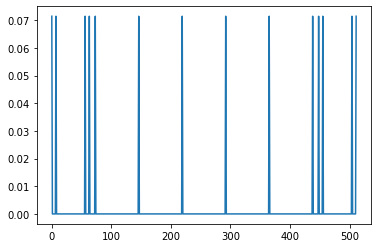

In [45]:
x = digit_basis(geometry=(3,3)) # this geometry represent 9 qubits
y = barstripe_pdf(geometry=(3,3))
plt.plot(x,y)


### <span style="color:blue;"> The Gaussians dataset  </span>

In [29]:
def digit_basis(geometry): # geometry like (4,4), np.arrange(5), or ([1,2,3,4,5])
    num_bit = np.prod(geometry)
    M = 2**num_bit
    x = np.arange(M)
    return x

def gaussian_pdf(geometry, mu, sigma):
    '''get gaussian distribution function'''
    x = digit_basis(geometry)
    pl = 1. / np.sqrt(2 * np.pi * sigma**2) * \
        np.exp(-(x - mu)**2 / (2. * sigma**2))
    return pl/pl.sum()

Example of Guassians Dataset

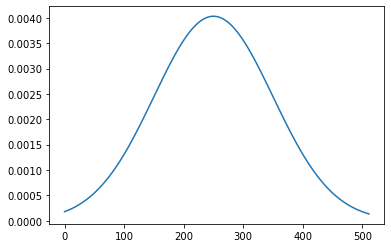

In [32]:
x = digit_basis(geometry=(3,3)) # this geometry represent 9 qbits
y = gaussian_pdf(geometry=(3,3),mu=250,sigma=100)
plt.plot(x,y)